This Colab contains dataset analysis and plotting figures

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
import os

#Replace this source with the local data you have downloaded from our Github
project_folder_path = '/content/drive/MyDrive/Project_C4'


if os.path.exists(project_folder_path):
    print(f"Contents of '{project_folder_path}':")
    for item in os.listdir(project_folder_path):
        print(item)
else:
    print(f"Cannot list contents: Folder '{project_folder_path}' does not exist.")


Contents of '/content/drive/MyDrive/Project_C4':
test_data
training_data
df_train.csv
df_test.csv


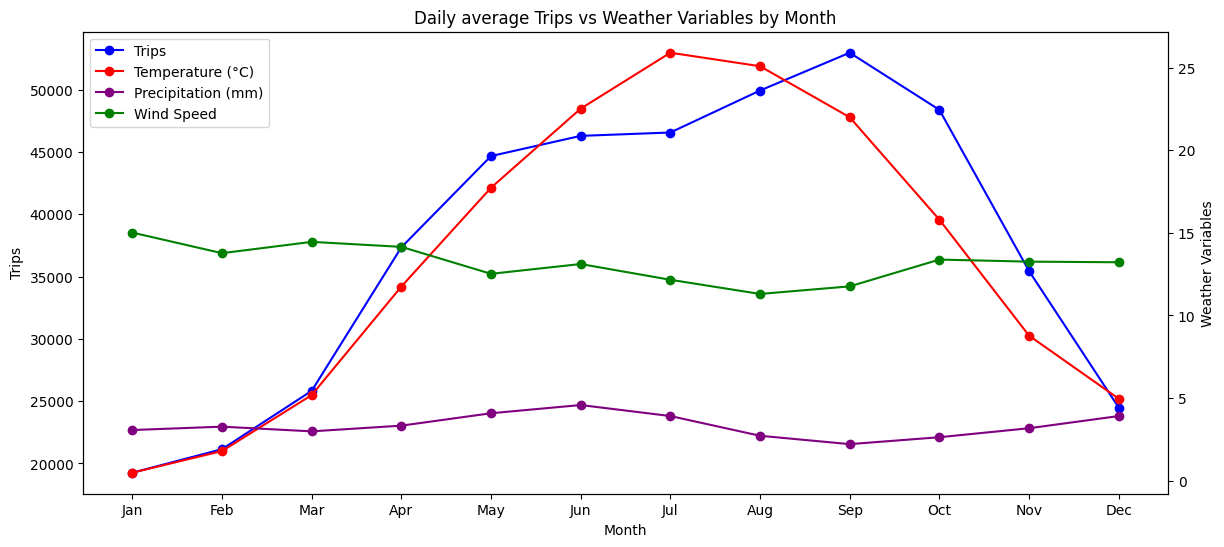

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
df_train = pd.read_csv(os.path.join(project_folder_path, "df_train.csv")) #Replace this source with the local data you have downloaded from our Github
df_train['date'] = pd.to_datetime(df_train['date'])

df_train['month'] = df_train['date'].dt.month
monthly_avg = df_train.groupby('month').agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

#Plot
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['tavg'], label='Temperature (°C)', color='red', marker='o')
ax2.plot(monthly_avg['month_name'], monthly_avg['prcp'], label='Precipitation (mm)', color='purple', marker='o')
ax2.plot(monthly_avg['month_name'], monthly_avg['wspd'], label='Wind Speed', color='green', marker='o')
ax2.set_ylabel('Weather Variables', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Daily average Trips vs Weather Variables by Month')
plt.savefig("Daily.pdf")
plt.show()


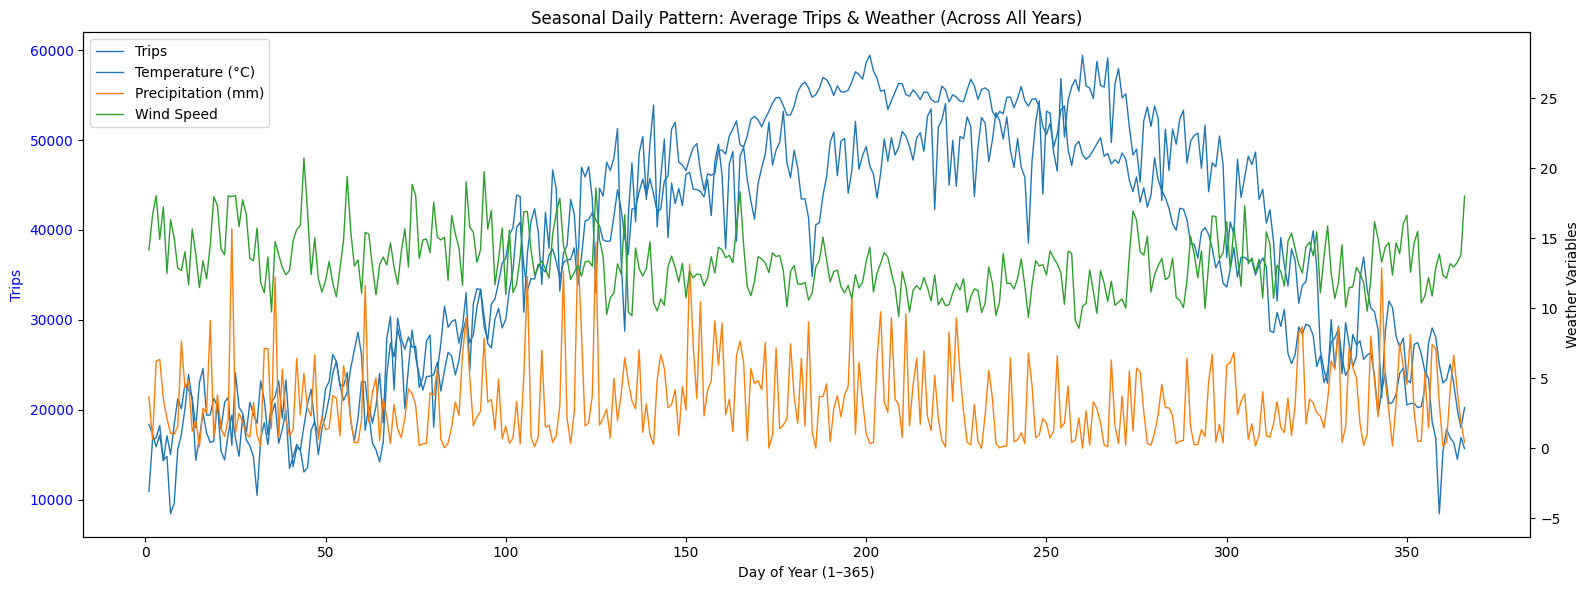

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df_train = pd.read_csv(os.path.join(project_folder_path, "df_train.csv")) #Replace this source with the local data you have downloaded from our Github

df_train['date'] = pd.to_datetime(df_train['date'])

df_train['day_of_year'] = df_train['date'].dt.dayofyear

daily_seasonal = df_train.groupby('day_of_year').agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(16,6))
ax1.plot(daily_seasonal['day_of_year'], daily_seasonal['trips'],
         label='Trips', linewidth=1)
ax1.set_xlabel('Day of Year (1–365)')
ax1.set_ylabel('Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Weather variables
ax2 = ax1.twinx()
ax2.plot(daily_seasonal['day_of_year'], daily_seasonal['tavg'], label='Temperature (°C)', linewidth=1)
ax2.plot(daily_seasonal['day_of_year'], daily_seasonal['prcp'], label='Precipitation (mm)', linewidth=1)
ax2.plot(daily_seasonal['day_of_year'], daily_seasonal['wspd'], label='Wind Speed', linewidth=1)

ax2.set_ylabel('Weather Variables', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Seasonal Daily Pattern: Average Trips & Weather (Across All Years)')
plt.tight_layout()
plt.show()


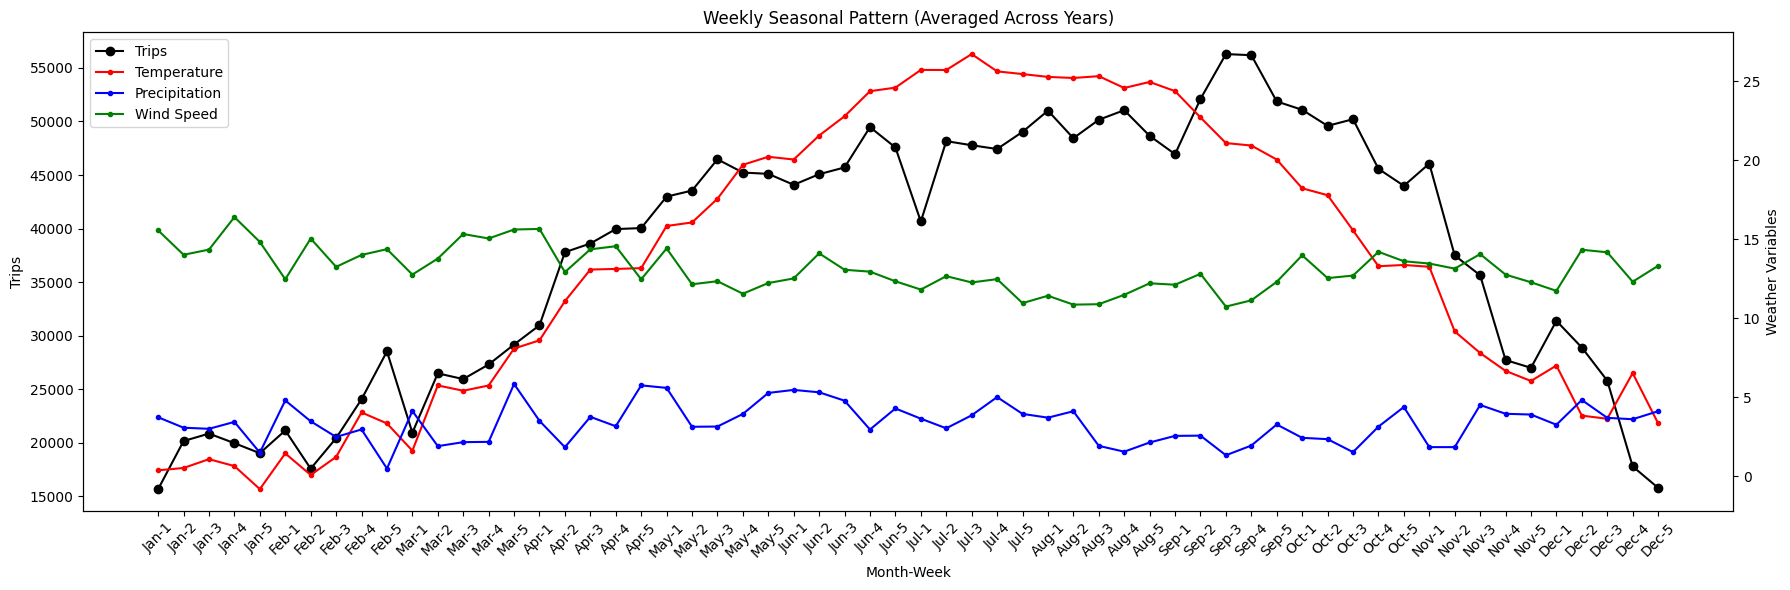

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

df_train = pd.read_csv(os.path.join(project_folder_path, "df_train.csv")) #Replace this source with the local data you have downloaded from our Github
df_train['date'] = pd.to_datetime(df_train['date'])

df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.day // 7 + 1

weekly_avg = df_train.groupby(['month', 'week']).agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

weekly_avg['label'] = weekly_avg['month'].apply(lambda m: calendar.month_abbr[m]) + "-" + weekly_avg['week'].astype(str)

fig, ax1 = plt.subplots(figsize=(18,6))
ax1.plot(weekly_avg['label'], weekly_avg['trips'],
         label='Trips', color='black', marker='o')

ax1.set_xlabel('Month-Week')
ax1.set_ylabel('Trips', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(weekly_avg['label'], weekly_avg['tavg'],  label='Temperature',  color='red',   marker='.')
ax2.plot(weekly_avg['label'], weekly_avg['prcp'], label='Precipitation', color='blue',  marker='.')
ax2.plot(weekly_avg['label'], weekly_avg['wspd'], label='Wind Speed',    color='green', marker='.')

ax2.set_ylabel('Weather Variables', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Weekly Seasonal Pattern (Averaged Across Years)')
plt.tight_layout()
plt.show()


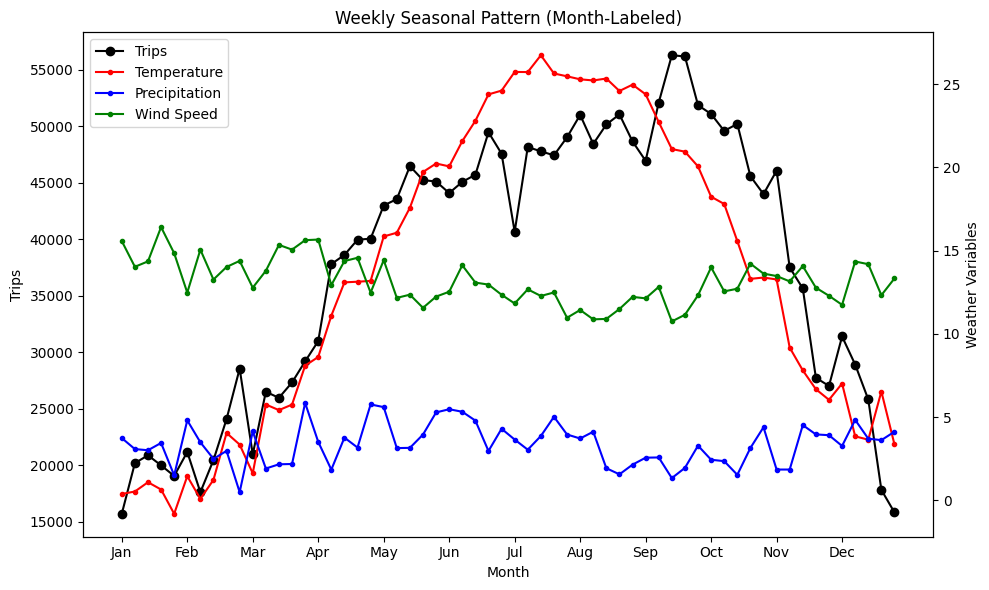

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

df_train = pd.read_csv(os.path.join(project_folder_path, "df_train.csv")) #Replace this source with the local data you have downloaded from our Github
df_train['date'] = pd.to_datetime(df_train['date'])

df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.day // 7 + 1

weekly_avg = df_train.groupby(['month', 'week']).agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

weekly_avg['x'] = range(len(weekly_avg))

month_starts = weekly_avg.groupby('month')['x'].min().values
month_labels = [calendar.month_abbr[m] for m in weekly_avg['month'].unique()]

fig, ax1 = plt.subplots(figsize=(10,6))


ax1.plot(weekly_avg['x'], weekly_avg['trips'],
         label='Trips', color='black', marker='o')

ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_labels)

ax2 = ax1.twinx()
ax2.plot(weekly_avg['x'], weekly_avg['tavg'], label='Temperature', color='red', marker='.')
ax2.plot(weekly_avg['x'], weekly_avg['prcp'], label='Precipitation', color='blue', marker='.')
ax2.plot(weekly_avg['x'], weekly_avg['wspd'], label='Wind Speed', color='green', marker='.')

ax2.set_ylabel('Weather Variables', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Weekly Seasonal Pattern (Month-Labeled)')
plt.tight_layout()
plt.show()


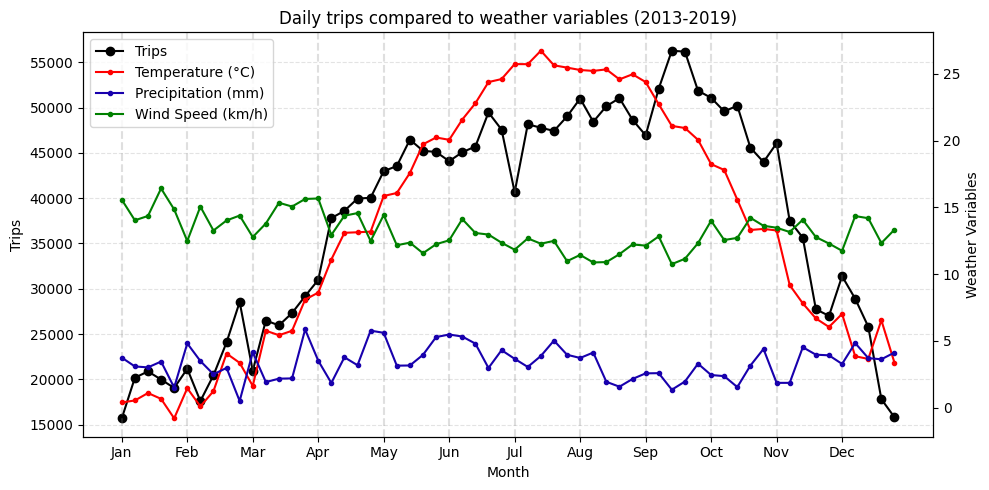

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

df_train = pd.read_csv(os.path.join(project_folder_path, "df_train.csv")) #Replace this source with the local data you have downloaded from our Github

df_train['date'] = pd.to_datetime(df_train['date'])

df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.day // 7 + 1

weekly_avg = df_train.groupby(['month', 'week']).agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

weekly_avg['x'] = range(len(weekly_avg))

month_starts = weekly_avg.groupby('month')['x'].min().values
month_labels = [calendar.month_abbr[m] for m in weekly_avg['month'].unique()]

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(weekly_avg['x'], weekly_avg['trips'],
         label='Trips', color='black', marker='o')

ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_labels)

ax1.grid(axis='y', linestyle='--', alpha=0.35)

for x in month_starts:
    ax1.axvline(x=x, color='gray', linestyle='--', alpha=0.25)

ax2 = ax1.twinx()
ax2.plot(weekly_avg['x'], weekly_avg['tavg'], label='Temperature (°C)', color='red', marker='.')
ax2.plot(weekly_avg['x'], weekly_avg['prcp'], label='Precipitation (mm)', color='#1800ad', marker='.')
ax2.plot(weekly_avg['x'], weekly_avg['wspd'], label='Wind Speed (km/h)', color='green', marker='.')

ax2.set_ylabel('Weather Variables', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Daily trips compared to weather variables (2013-2019)')
plt.tight_layout()
plt.savefig("TripsVSweather.pdf")

plt.show()


In [16]:
import pandas as pd
import os

project_folder_path = '/content/drive/MyDrive/Project_C4/' #Replace this source with the local data you have downloaded from our Github
citibike_file_path = os.path.join(project_folder_path, 'training_data/citibike_all_daily_by_gender_age.csv')

if os.path.exists(citibike_file_path):
    print(f"\n--- Displaying first 5 rows of '{os.path.basename(citibike_file_path)}' ---")
    citibike = pd.read_csv(citibike_file_path)
    display(citibike.head())
else:
    print(f"File '{os.path.basename(citibike_file_path)}' not found.")

weather_file_path = os.path.join(project_folder_path, 'training_data/weather_with_days.csv')
if os.path.exists(weather_file_path):
    print(f"\n--- Displaying first 5 rows of '{os.path.basename(weather_file_path)}' ---")
    weather = pd.read_csv(weather_file_path)
    display(weather.head())
else:
    print(f"File '{os.path.basename(weather_file_path)}' not found.")


--- Displaying first 5 rows of 'citibike_all_daily_by_gender_age.csv' ---


,date,gender,age_group,trips,avg_duration,median_duration,unique_bikes,subscribers,customers
0,2013-06-01,Female,18-25,56,4439.1,896.0,49,56,0
1,2013-06-01,Unknown,Unknown,3574,2588.4,1360.0,1898,0,3574
2,2013-06-01,Unknown,18-25,7,2019.0,1329.0,7,7,0
3,2013-06-01,Male,<18,6,815.5,582.5,5,6,0
4,2013-06-01,Male,46-60,860,1761.8,736.0,677,860,0



--- Displaying first 5 rows of 'weather_with_days.csv' ---


,time,tavg,tmin,tmax,prcp,wspd,coco,weather,day_name,day_of_week,is_weekend,season
0,2013-06-01,28.1,22.2,33.3,0.0,17.1,NaN,Unknown,Saturday,5,1,Spring
1,2013-06-02,27.8,23.3,32.2,0.0,21.1,NaN,Unknown,Sunday,6,1,Spring
2,2013-06-03,23.6,21.1,29.4,44.6,13.2,NaN,Unknown,Monday,0,0,Spring
3,2013-06-04,20.2,14.4,25.0,0.0,19.5,NaN,Unknown,Tuesday,1,0,Spring
4,2013-06-05,19.0,12.8,23.3,0.0,14.2,NaN,Unknown,Wednesday,2,0,Spring


In [17]:
import matplotlib.pyplot as plt

weather.rename(columns={"time": "date"}, inplace=True)
citibike["date"] = pd.to_datetime(citibike["date"])
weather["date"] = pd.to_datetime(weather["date"])

df = pd.merge(citibike, weather, on="date", how="inner")

daily = df.groupby("date", as_index=False).agg({
    "trips": "sum",
    "tavg": "mean",
    "prcp": "mean",
    "wspd": "mean",
    "season": "first",
    "is_weekend": "first",
})

plt.style.use("default")
plt.rcParams["figure.figsize"] = (10,6)


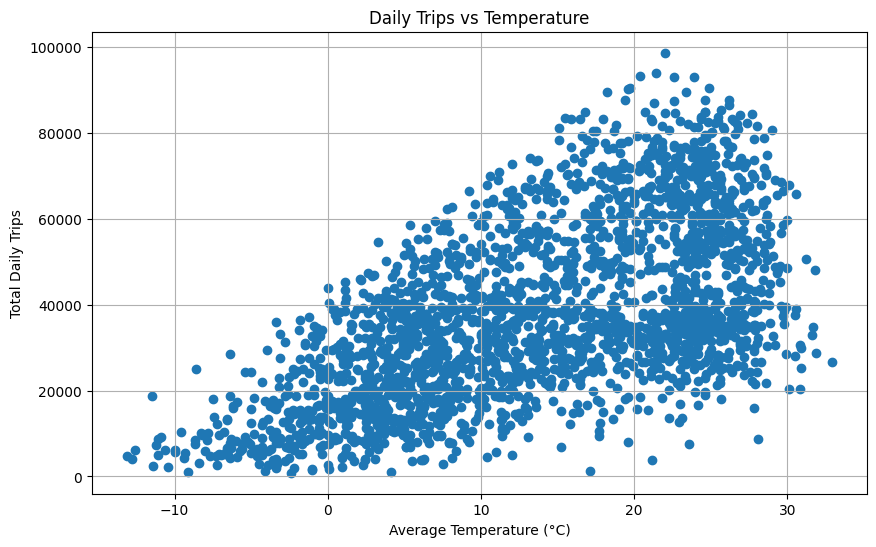

In [18]:
plt.figure()
plt.scatter(daily["tavg"], daily["trips"])
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Total Daily Trips")
plt.title("Daily Trips vs Temperature")
plt.grid(True)
plt.show()

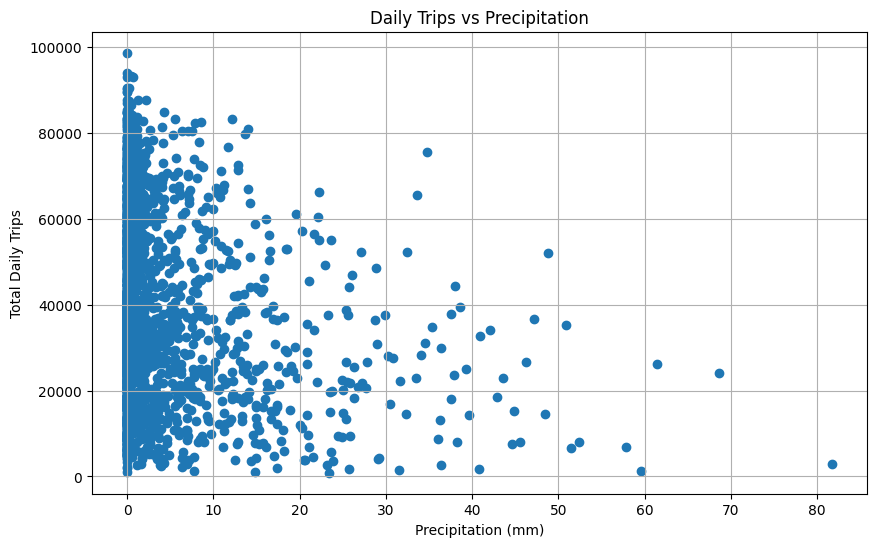

In [19]:
plt.figure()
plt.scatter(daily["prcp"], daily["trips"])
plt.xlabel("Precipitation (mm)")
plt.ylabel("Total Daily Trips")
plt.title("Daily Trips vs Precipitation")
plt.grid(True)
plt.show()

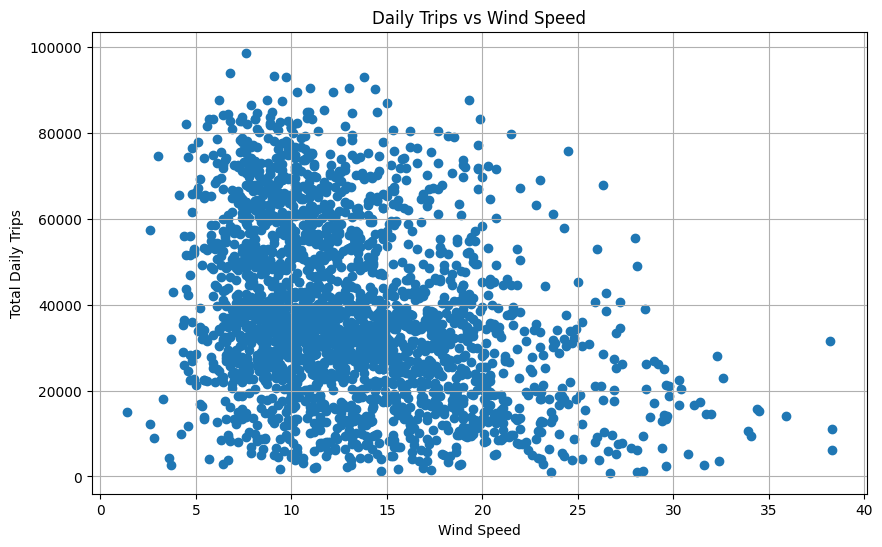

In [20]:
plt.figure()
plt.scatter(daily["wspd"], daily["trips"])
plt.xlabel("Wind Speed")
plt.ylabel("Total Daily Trips")
plt.title("Daily Trips vs Wind Speed")
plt.grid(True)
plt.show()

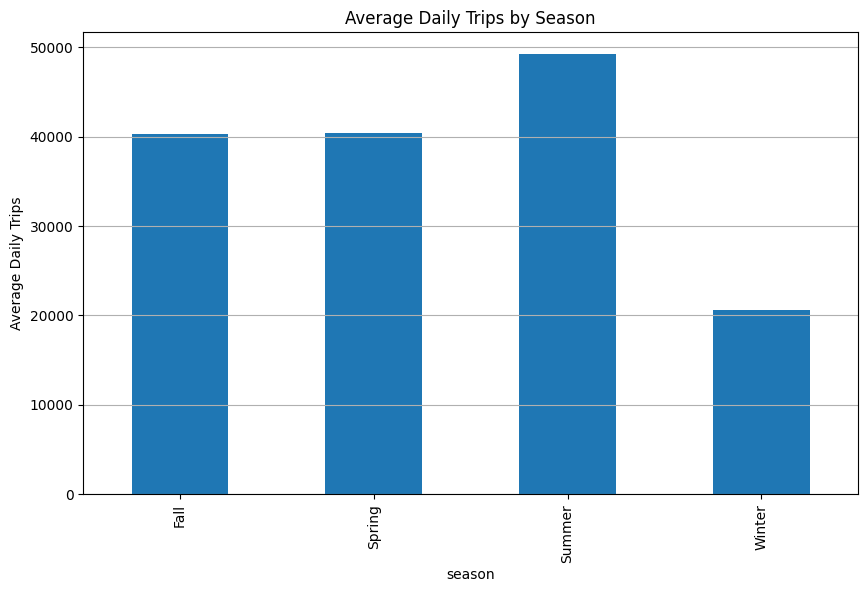

In [21]:
plt.figure()
daily.groupby("season")["trips"].mean().plot(kind="bar")
plt.ylabel("Average Daily Trips")
plt.title("Average Daily Trips by Season")
plt.grid(True, axis="y")
plt.show()


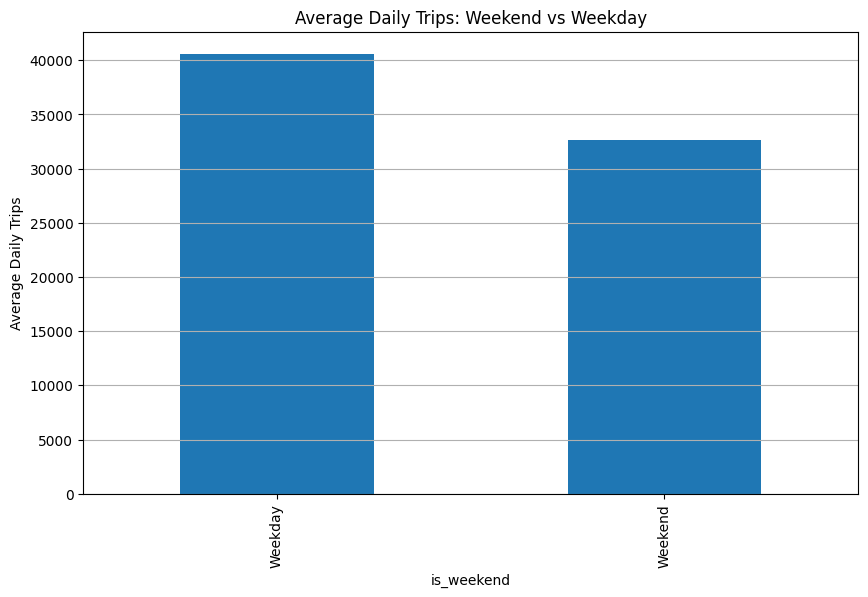

In [22]:
plt.figure()
daily.groupby("is_weekend")["trips"].mean().plot(kind="bar")
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.ylabel("Average Daily Trips")
plt.title("Average Daily Trips: Weekend vs Weekday")
plt.grid(True, axis="y")
plt.show()

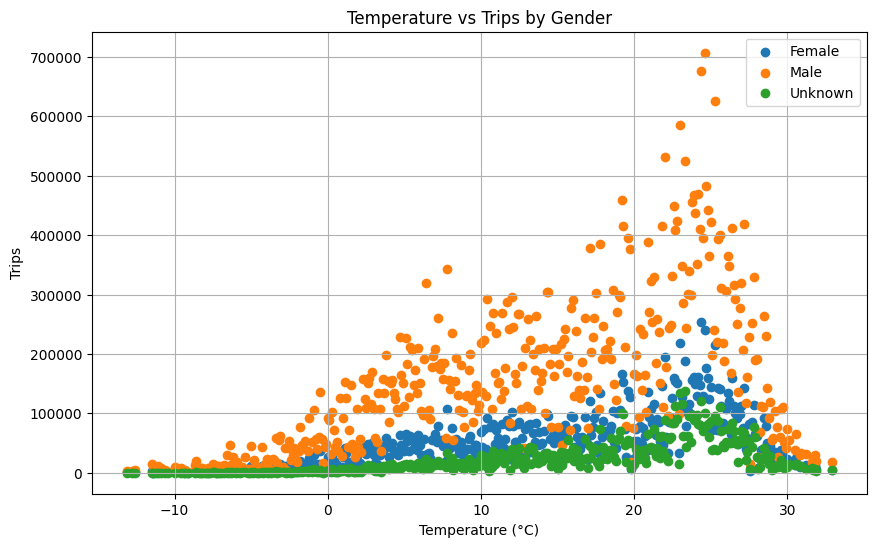

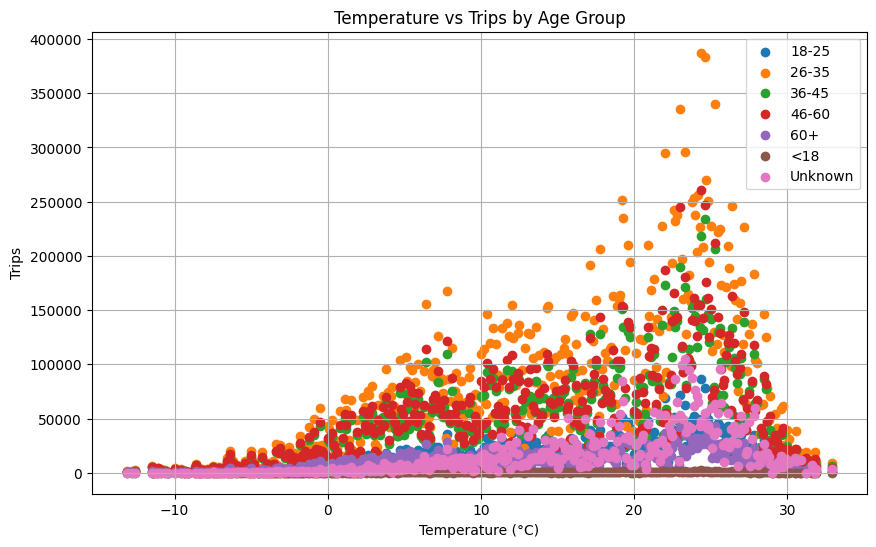

In [23]:
gender_temp = df.groupby(["gender","tavg"])["trips"].sum().reset_index()

plt.figure()
for g in gender_temp["gender"].unique():
    subset = gender_temp[gender_temp["gender"] == g]
    plt.scatter(subset["tavg"], subset["trips"], label=g)

plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips")
plt.title("Temperature vs Trips by Gender")
plt.grid(True)
plt.show()

age_temp = df.groupby(["age_group","tavg"])["trips"].sum().reset_index()

plt.figure()
for a in age_temp["age_group"].unique():
    subset = age_temp[age_temp["age_group"] == a]
    plt.scatter(subset["tavg"], subset["trips"], label=a)

plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips")
plt.title("Temperature vs Trips by Age Group")
plt.grid(True)
plt.show()


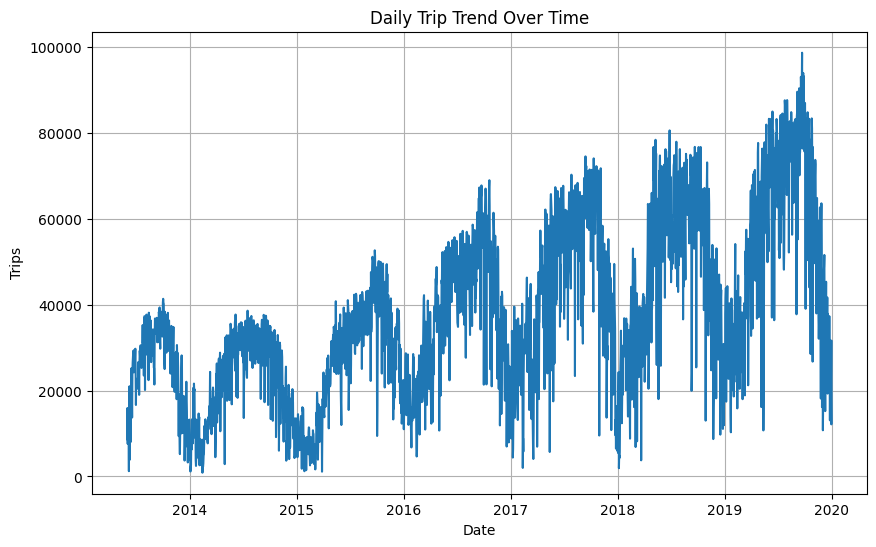

In [24]:
plt.figure()
plt.plot(daily["date"], daily["trips"])
plt.xlabel("Date")
plt.ylabel("Trips")
plt.title("Daily Trip Trend Over Time")
plt.grid(True)
plt.show()



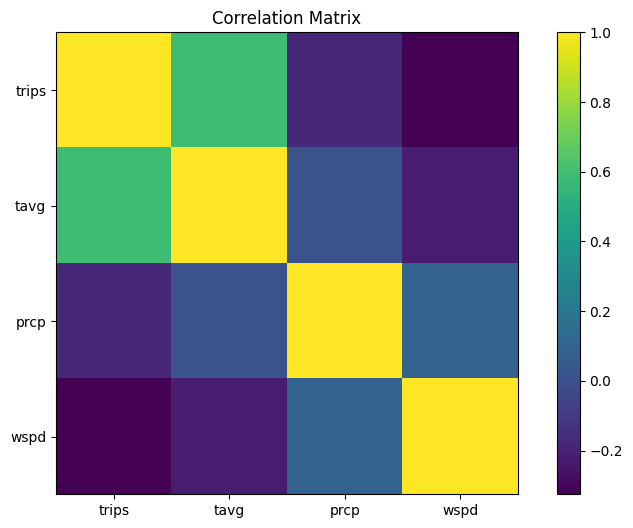

In [25]:
corr = daily[["trips","tavg","prcp","wspd"]].corr()

plt.figure()
plt.imshow(corr, cmap="viridis", interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


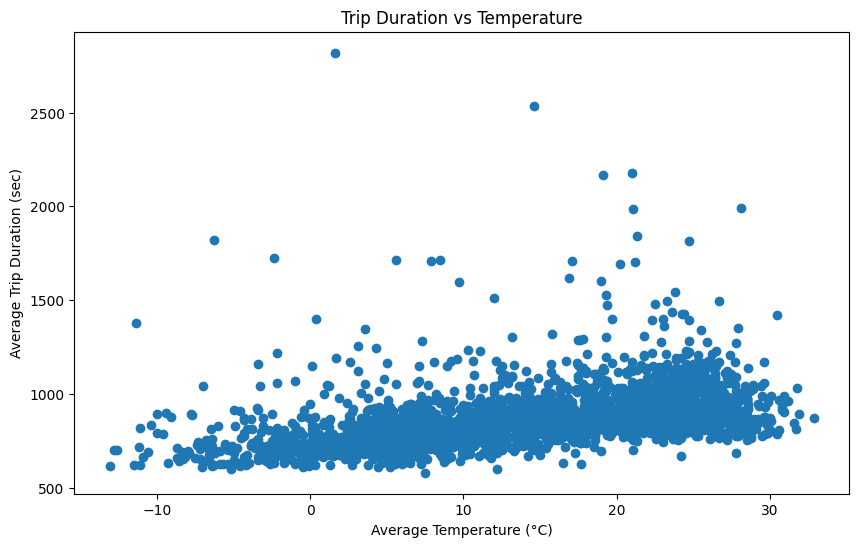

In [26]:
duration_daily = df.groupby("date", as_index=False).agg({
    "avg_duration": "mean",
    "tavg": "mean",
    "prcp": "mean",
    "wspd": "mean",
})

plt.figure()
plt.scatter(duration_daily["tavg"], duration_daily["avg_duration"])
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Trip Duration (sec)")
plt.title("Trip Duration vs Temperature")
plt.show()

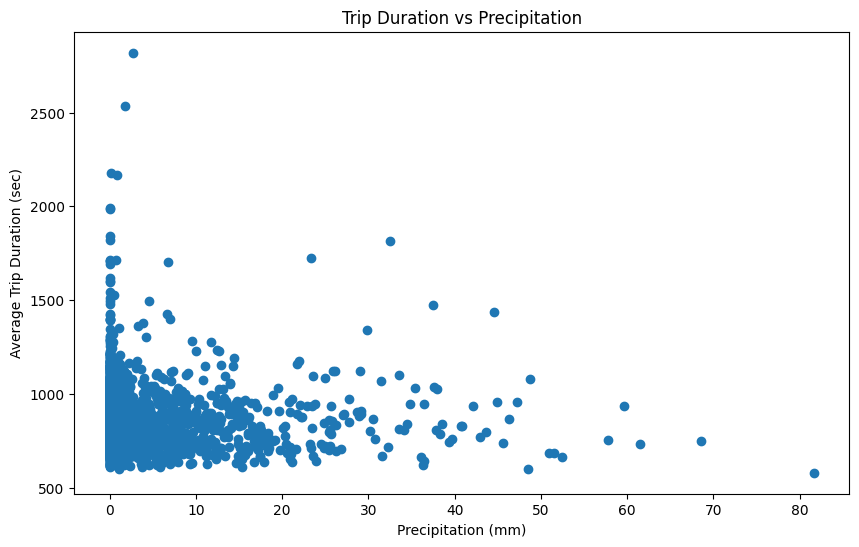

In [27]:
plt.figure()
plt.scatter(duration_daily["prcp"], duration_daily["avg_duration"])
plt.xlabel("Precipitation (mm)")
plt.ylabel("Average Trip Duration (sec)")
plt.title("Trip Duration vs Precipitation")
plt.show()

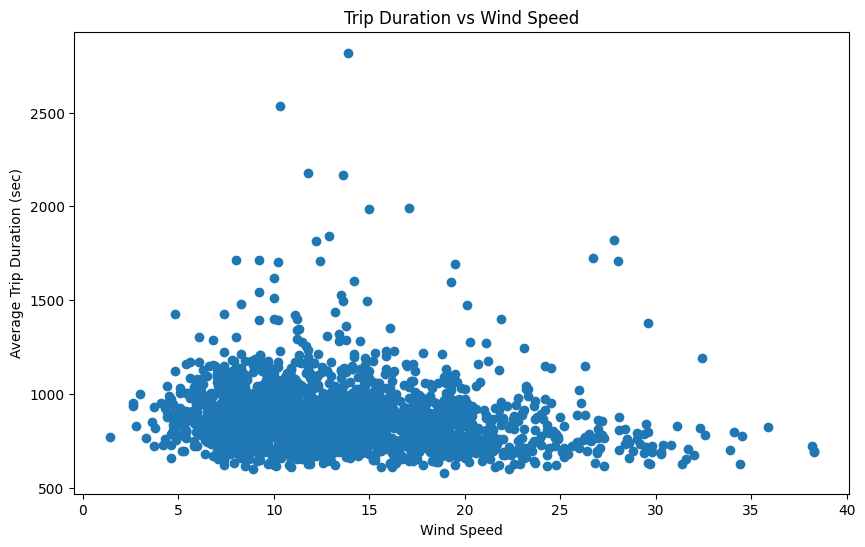

In [28]:
plt.figure()
plt.scatter(duration_daily["wspd"], duration_daily["avg_duration"])
plt.xlabel("Wind Speed")
plt.ylabel("Average Trip Duration (sec)")
plt.title("Trip Duration vs Wind Speed")
plt.show()

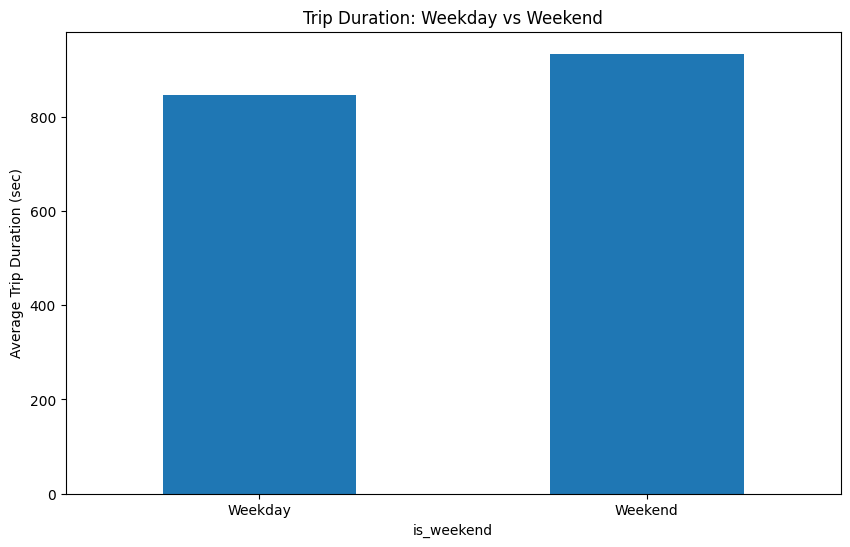

In [29]:
duration_daily = df.groupby("date", as_index=False).agg({
    "avg_duration": "mean",
    "season": "first",
    "is_weekend": "first"
})

plt.figure()
duration_daily.groupby("is_weekend")["avg_duration"].mean().plot(kind="bar")

plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)
plt.ylabel("Average Trip Duration (sec)")
plt.title("Trip Duration: Weekday vs Weekend")
plt.show()


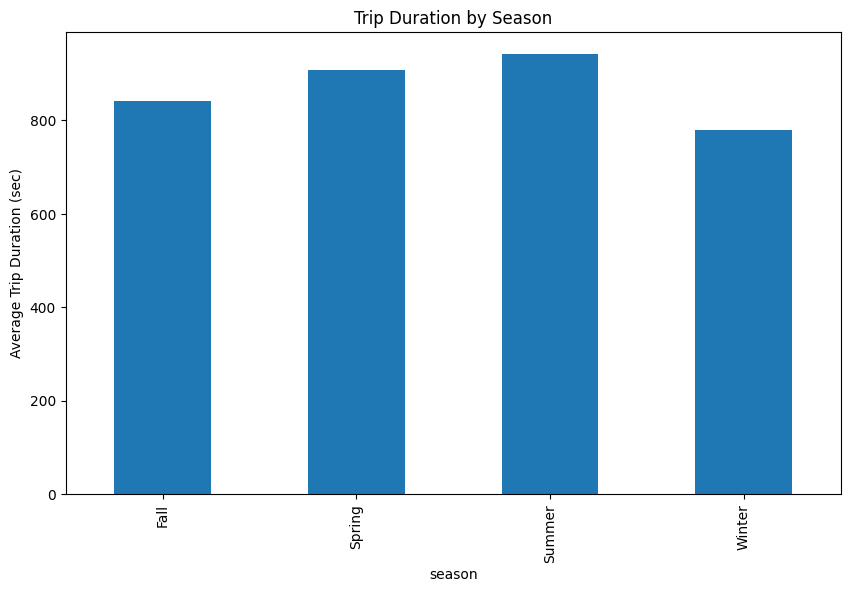

In [30]:
plt.figure()
duration_daily.groupby("season")["avg_duration"].mean().plot(kind="bar")

plt.ylabel("Average Trip Duration (sec)")
plt.title("Trip Duration by Season")
plt.show()


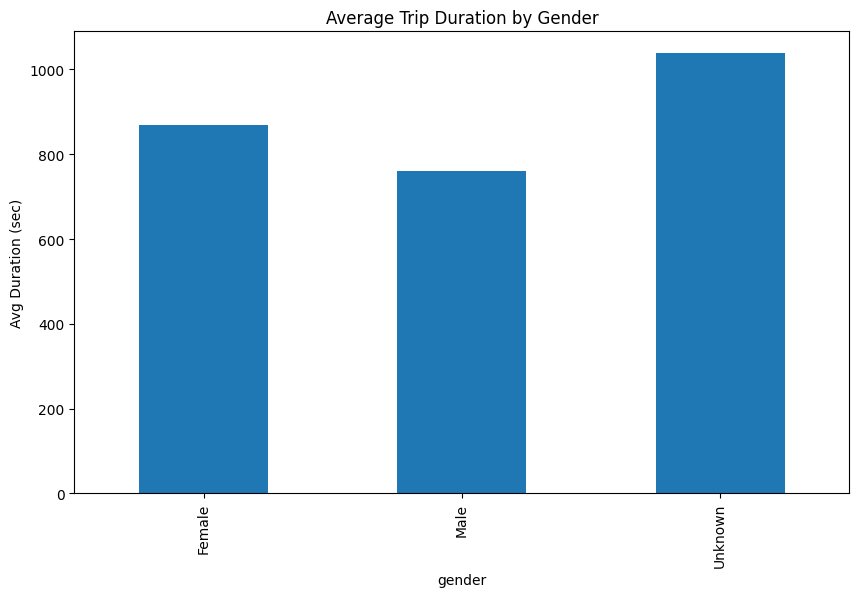

In [31]:
plt.figure()
df.groupby("gender")["avg_duration"].mean().plot(kind="bar")
plt.title("Average Trip Duration by Gender")
plt.ylabel("Avg Duration (sec)")
plt.show()

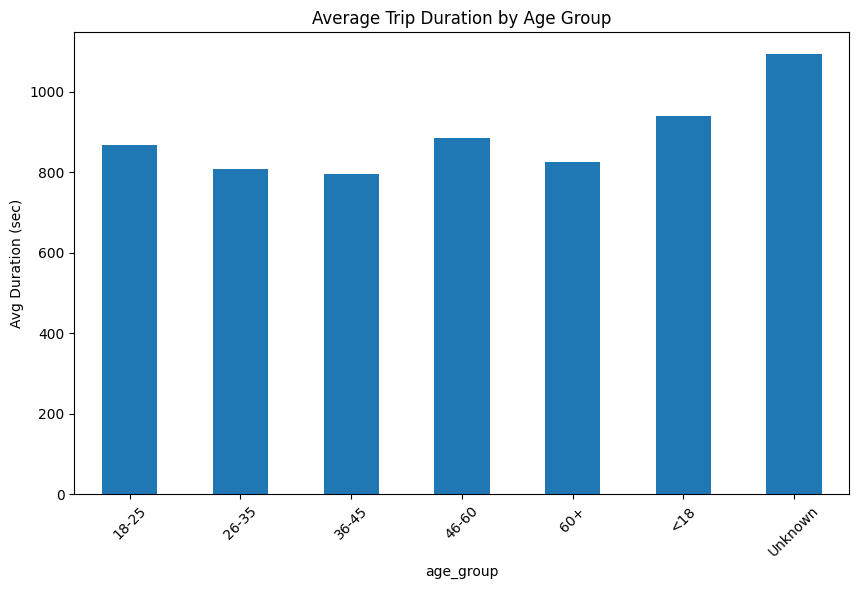

In [32]:
plt.figure()
df.groupby("age_group")["avg_duration"].mean().plot(kind="bar")
plt.title("Average Trip Duration by Age Group")
plt.ylabel("Avg Duration (sec)")
plt.xticks(rotation=45)
plt.show()

In [33]:
daily = df.groupby("date", as_index=False).agg({
    "trips": "sum",
    "tavg": "mean",
    "prcp": "mean",
    "wspd": "mean",
    "season": "first",
    "is_weekend": "first",
})

duration_daily = df.groupby("date", as_index=False).agg({
    "avg_duration": "mean",
    "tavg": "mean",
    "prcp": "mean",
    "wspd": "mean",
    "season": "first",
    "is_weekend": "first",
})

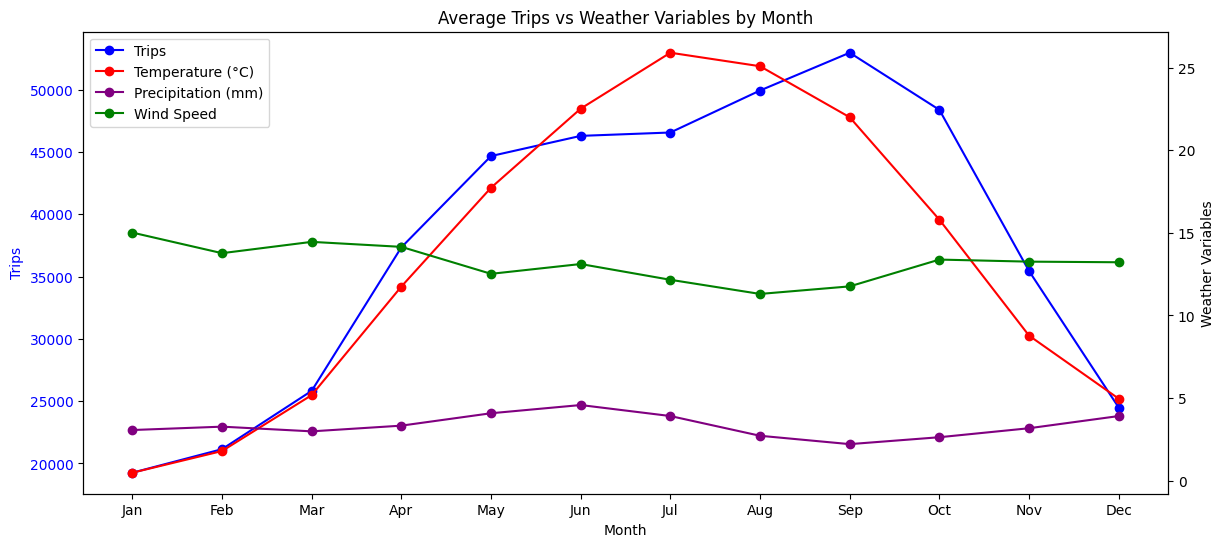

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

daily['date'] = pd.to_datetime(daily['date'])
daily['month'] = daily['date'].dt.month
monthly_avg = daily.groupby('month').agg({
    'trips': 'mean',
    'tavg': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
}).reset_index()

monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

#Plot
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['tavg'], label='Temperature (°C)', color='red', marker='o')
ax2.plot(monthly_avg['month_name'], monthly_avg['prcp'], label='Precipitation (mm)', color='purple', marker='o')
ax2.plot(monthly_avg['month_name'], monthly_avg['wspd'], label='Wind Speed', color='green', marker='o')
ax2.set_ylabel('Weather Variables', color='black')
ax2.tick_params(axis='y', labelcolor='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Average Trips vs Weather Variables by Month')
plt.show()


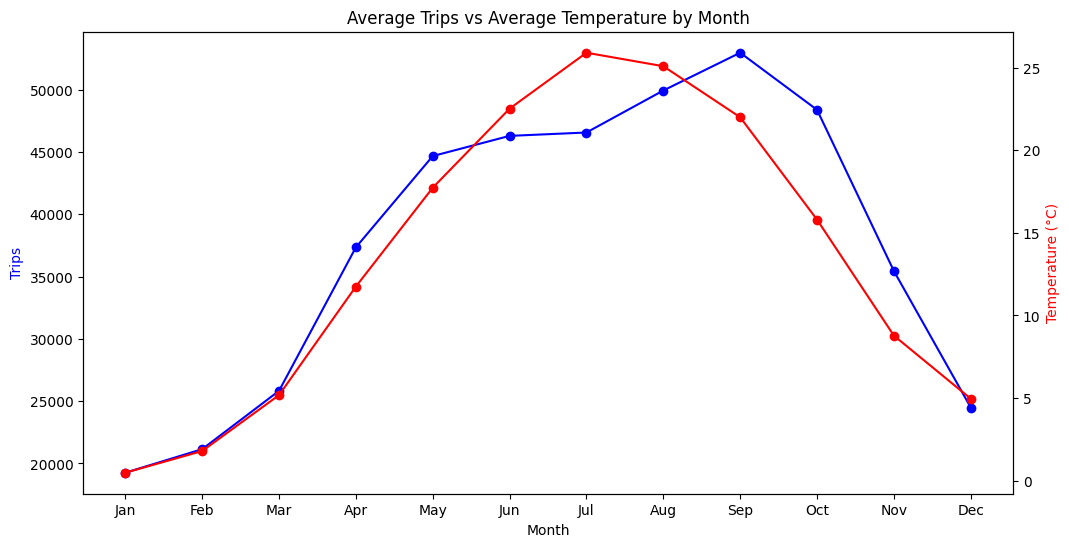

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

daily['date'] = pd.to_datetime(daily['date'])
daily['month'] = daily['date'].dt.month
monthly_avg = daily.groupby('month').agg({
    'trips': 'mean',
    'tavg': 'mean'
}).reset_index()

import calendar
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

#Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['tavg'], label='Temperature (°C)', color='red', marker='o')
ax2.set_ylabel('Temperature (°C)', color='red')

plt.title('Average Trips vs Average Temperature by Month')
plt.show()


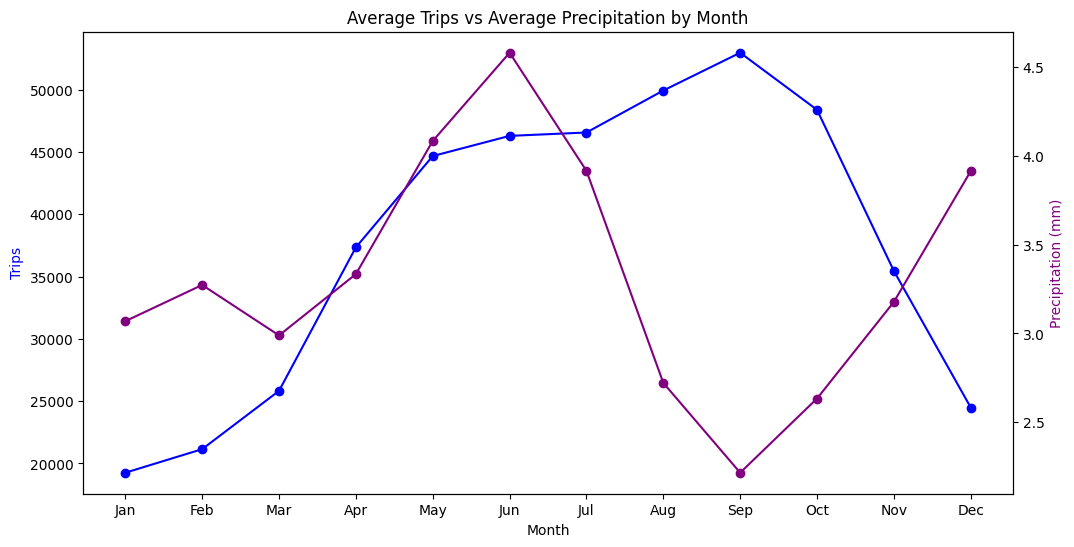

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

daily['date'] = pd.to_datetime(daily['date'])
daily['month'] = daily['date'].dt.month

# Aggregate by month across all years
monthly_avg = daily.groupby('month').agg({
    'trips': 'mean',
    'prcp': 'mean'
}).reset_index()
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

#Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['prcp'], label='Precipitation (mm)', color='purple', marker='o')
ax2.set_ylabel('Precipitation (mm)', color='purple')

plt.title('Average Trips vs Average Precipitation by Month')
plt.show()


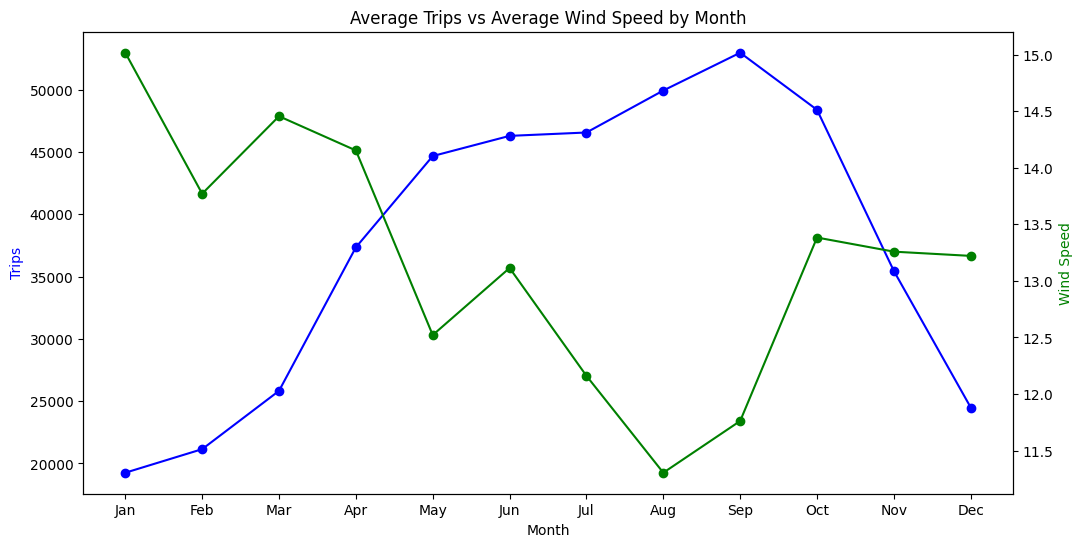

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

daily['date'] = pd.to_datetime(daily['date'])
daily['month'] = daily['date'].dt.month
monthly_avg = daily.groupby('month').agg({
    'trips': 'mean',
    'wspd': 'mean'
}).reset_index()


monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

#Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly_avg['month_name'], monthly_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trips', color='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_avg['month_name'], monthly_avg['wspd'], label='Wind Speed', color='green', marker='o')
ax2.set_ylabel('Wind Speed', color='green')

plt.title('Average Trips vs Average Wind Speed by Month')
plt.show()


/tmp/ipython-input-419168842.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = merged_daily.groupby('tbin').agg({


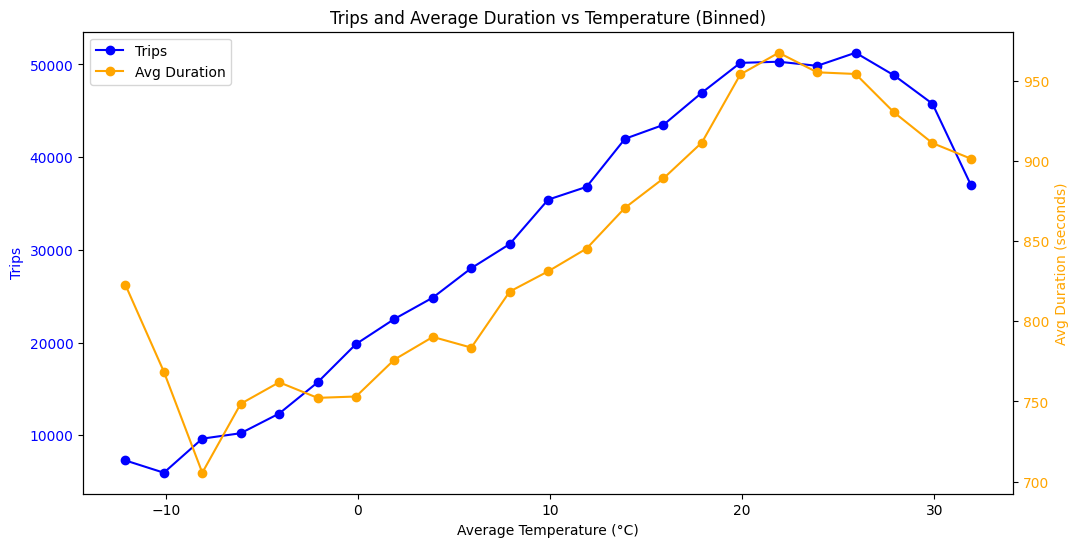

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Merge trips and duration
merged_daily = pd.merge(
    daily[['date', 'trips', 'tavg']],
    duration_daily[['date', 'avg_duration']],
    on='date'
)

#temperature bins
merged_daily['tbin'] = pd.cut(merged_daily['tavg'], bins=np.arange(merged_daily['tavg'].min(), merged_daily['tavg'].max()+2, 2))

#Aggregate trips and duration per bin
temp_avg = merged_daily.groupby('tbin').agg({
    'trips': 'mean',
    'avg_duration': 'mean'
}).reset_index()

temp_avg['t_center'] = temp_avg['tbin'].apply(lambda x: x.mid)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(temp_avg['t_center'], temp_avg['trips'], label='Trips', color='blue', marker='o')
ax1.set_xlabel('Average Temperature (°C)')
ax1.set_ylabel('Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(temp_avg['t_center'], temp_avg['avg_duration'], label='Avg Duration', color='orange', marker='o')
ax2.set_ylabel('Avg Duration (seconds)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Trips and Average Duration vs Temperature (Binned)')
plt.show()


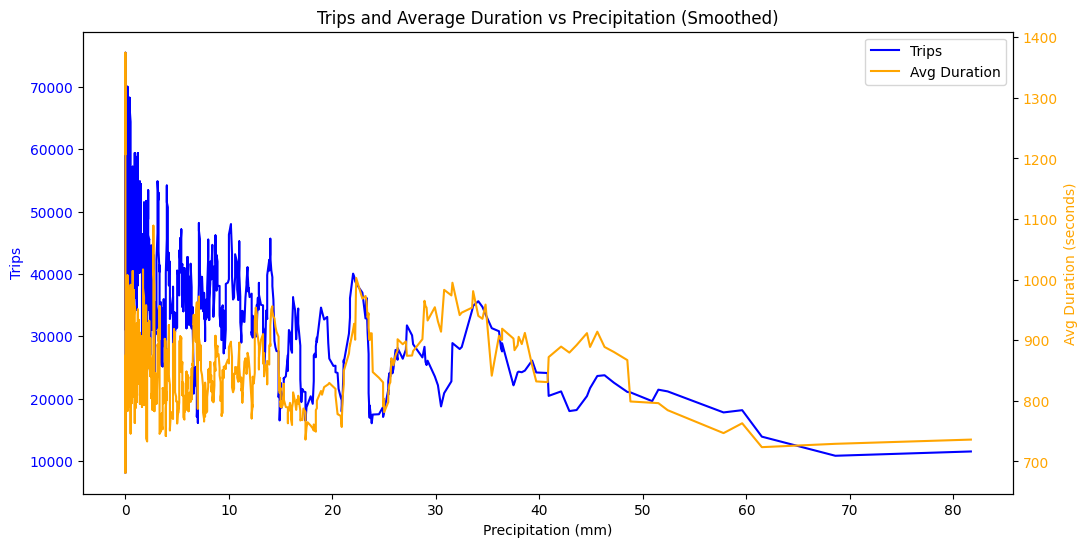

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Merge trips and duration
merged_daily = pd.merge(
    daily[['date', 'trips', 'prcp']],
    duration_daily[['date', 'avg_duration']],
    on='date'
)

#Sort by precipitation
merged_daily = merged_daily.sort_values('prcp')

#Compute rolling mean
window_size = 10
merged_daily['trips_smooth'] = merged_daily['trips'].rolling(window=window_size, min_periods=1, center=True).mean()
merged_daily['duration_smooth'] = merged_daily['avg_duration'].rolling(window=window_size, min_periods=1, center=True).mean()

#Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(merged_daily['prcp'], merged_daily['trips_smooth'], label='Trips', color='blue')
ax1.set_xlabel('Precipitation (mm)')
ax1.set_ylabel('Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_daily['prcp'], merged_daily['duration_smooth'], label='Avg Duration', color='orange')
ax2.set_ylabel('Avg Duration (seconds)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Trips and Average Duration vs Precipitation (Smoothed)')
plt.show()


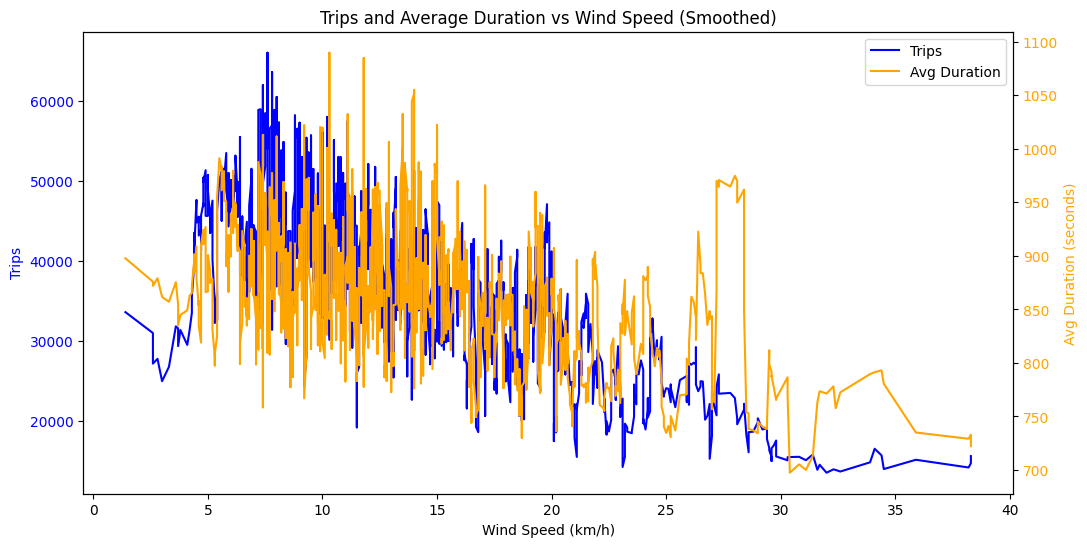

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

#Merge trips and duration
merged_daily = pd.merge(
    daily[['date', 'trips', 'wspd']],
    duration_daily[['date', 'avg_duration']],
    on='date'
)

#Sort by wind speed
merged_daily = merged_daily.sort_values('wspd')

#Apply rolling meaN
window_size = 10
merged_daily['trips_smooth'] = merged_daily['trips'].rolling(window=window_size, min_periods=1, center=True).mean()
merged_daily['duration_smooth'] = merged_daily['avg_duration'].rolling(window=window_size, min_periods=1, center=True).mean()

#Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(merged_daily['wspd'], merged_daily['trips_smooth'], label='Trips', color='blue')
ax1.set_xlabel('Wind Speed (km/h)')
ax1.set_ylabel('Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_daily['wspd'], merged_daily['duration_smooth'], label='Avg Duration', color='orange')
ax2.set_ylabel('Avg Duration (seconds)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Trips and Average Duration vs Wind Speed (Smoothed)')
plt.show()


ChatGPT was used for inspiration and troubleshooting.

